In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import darts
from darts import TimeSeries
from darts.dataprocessing.transformers import MissingValuesFiller
from statsmodels.graphics.tsaplots import plot_acf


# model
from darts.models import XGBModel
from darts.models import TCNModel,NBEATSModel,TransformerModel,BlockRNNModel

# darts model evaluation
from darts.metrics import mape, rmse, r2_score

In [2]:
# import data
df = pd.read_csv(r"C:\Users\dicod\Documents\2024\project_with Hamid(2024_3rd semester)\code\Data\final_df.csv")
df_price = df[['Date','Close']]
df_price['Date'] = pd.to_datetime(df_price['Date'])
df_price['Date'] = df_price['Date'].dt.strftime('%Y-%m-%d')
df_price['Date'] = df_price['Date'].apply(lambda x:x[0:10])
df_price['Date'] = pd.to_datetime(df_price['Date'])

# divide data which declared covid a pandemic on March 11, 2020.
df_price['Date'] = pd.to_datetime(df_price['Date'])

# define the covid date
covid_start = pd.to_datetime('2020-03-11')
covid_end = pd.to_datetime('2022-01-31')

# before
df_before_covid = df_price[df_price['Date'] < covid_start]

# covid
df_covid = df_price[(df_price['Date'] >= covid_start) & (df_price['Date'] <= covid_end)]

# after
df_after_covid = df_price[df_price['Date'] > covid_end]

print("before COVID-19:", df_before_covid)
print("COVID-19:", df_covid)
print("after COVID-19:", df_after_covid)

# Convert DataFrame to TimeSeries
ts_price = TimeSeries.from_dataframe(df_price, time_col=None , value_cols='Close', freq='D') # 2019.07.01 - 2024.03.24
ts_before_covid = TimeSeries.from_dataframe(df_before_covid, time_col="Date", value_cols='Close', fill_missing_dates=True, freq='D')
ts_covid = TimeSeries.from_dataframe(df_covid, time_col="Date", value_cols='Close', fill_missing_dates=False, freq='D')
ts_after_covid = TimeSeries.from_dataframe(df_after_covid, time_col="Date", value_cols='Close', fill_missing_dates=False, freq='D')

transformer = MissingValuesFiller()

ts_before_covid = transformer.transform(ts_before_covid)
ts_covid = transformer.transform(ts_covid)
ts_after_covid = transformer.transform(ts_after_covid)

before COVID-19:           Date       Close
0   2019-07-01  129.630798
1   2019-07-02  130.490707
2   2019-07-03  131.331467
3   2019-07-05  130.949295
4   2019-07-08  130.853790
..         ...         ...
170 2020-03-04  164.493179
171 2020-03-05  160.365143
172 2020-03-06  155.832077
173 2020-03-09  145.270920
174 2020-03-10  155.205185

[175 rows x 2 columns]
COVID-19:           Date       Close
175 2020-03-11  148.174042
176 2020-03-12  134.121506
177 2020-03-13  153.189362
178 2020-03-16  130.610794
179 2020-03-17  141.364807
..         ...         ...
648 2022-01-25  282.776978
649 2022-01-26  290.834167
650 2022-01-27  293.902161
651 2022-01-28  302.155518
652 2022-01-31  304.821594

[478 rows x 2 columns]
after COVID-19:            Date       Close
653  2022-02-01  302.645569
654  2022-02-02  307.252502
655  2022-02-03  295.284302
656  2022-02-04  299.881409
657  2022-02-07  294.990234
...         ...         ...
1186 2024-03-18  417.320007
1187 2024-03-19  421.410004
1188 2024

C:\Users\dicod\AppData\Local\Temp\ipykernel_19788\1326860003.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_price['Date'] = pd.to_datetime(df_price['Date'])
C:\Users\dicod\AppData\Local\Temp\ipykernel_19788\1326860003.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_price['Date'] = df_price['Date'].dt.strftime('%Y-%m-%d')
C:\Users\dicod\AppData\Local\Temp\ipykernel_19788\1326860003.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

### statistical model 
1. Arima model
- define the parameters, p(0), d(1), q(0)
- p is the number of autoregressive term from AR.
- d is defferencing to make data stationary :  Arima models precondition is data should be stationary.
- q is the number of lagged forecast error in the prediction equation from MA.

2. Exponential smoothing model
- check the pattern and seasonality


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


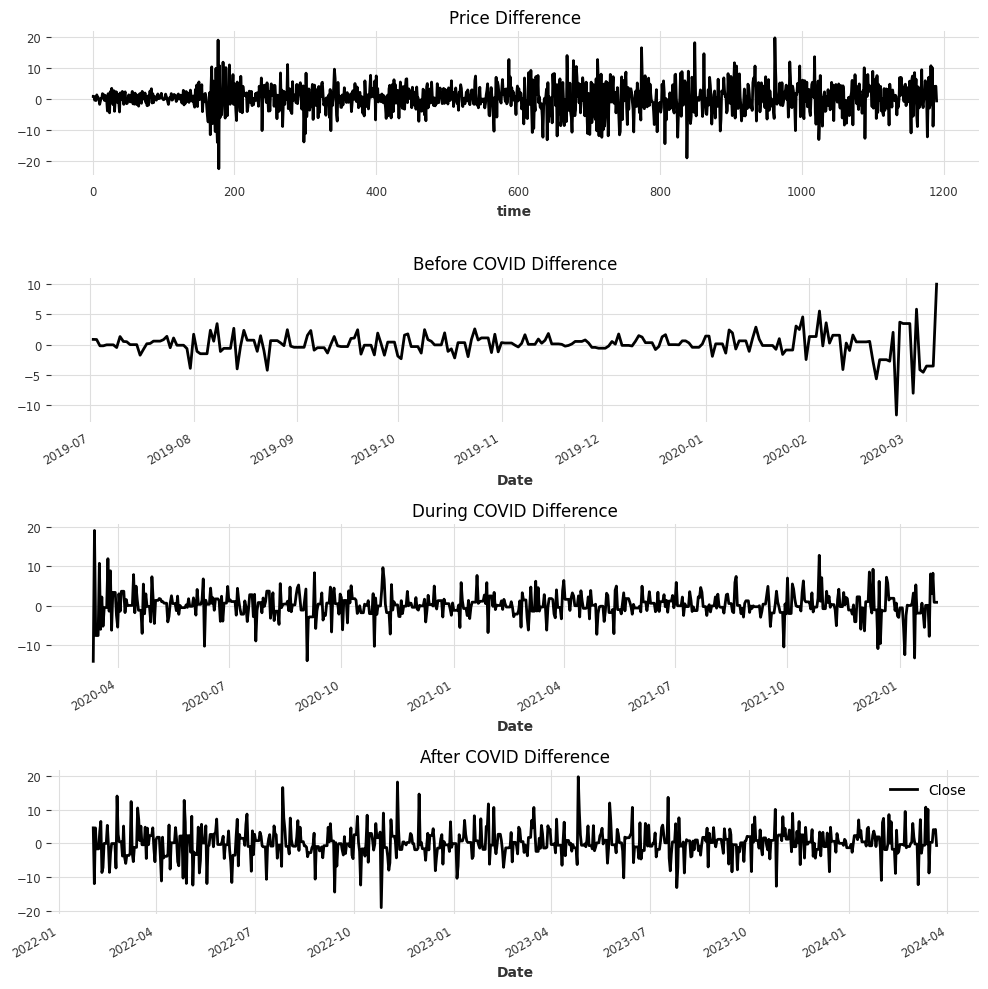

In [58]:
# diff_1

# Create subplots
fig, axes = plt.subplots(4, 1, figsize=(10, 10))

# Plot each TimeSeries
ts_price.diff().plot(ax=axes[0])
axes[0].set_title('Price Difference')

ts_before_covid.diff().plot(ax=axes[1])
axes[1].set_title('Before COVID Difference')

ts_covid.diff().plot(ax=axes[2])
axes[2].set_title('During COVID Difference')

ts_after_covid.diff().plot(ax=axes[3])
axes[3].set_title('After COVID Difference')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show() 

# D = 1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


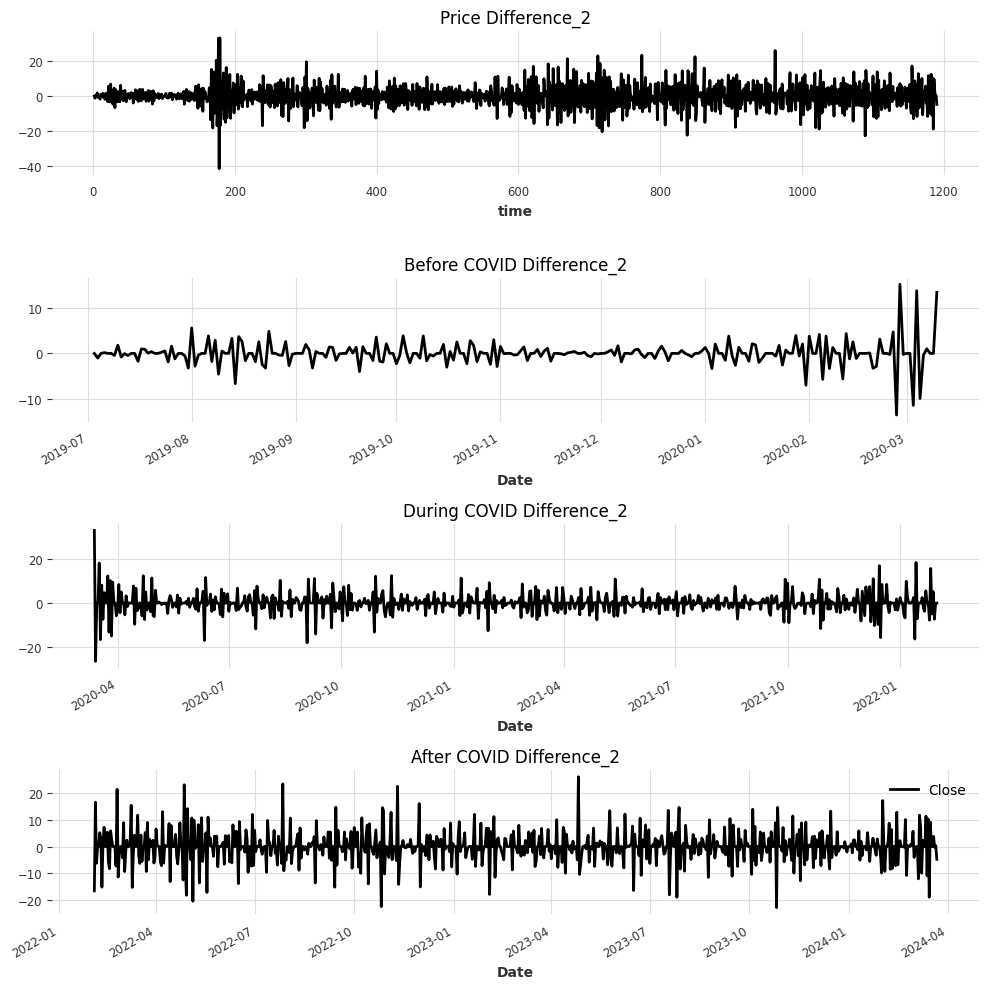

In [60]:
# diff_2

# Create subplots
fig, axes = plt.subplots(4, 1, figsize=(10, 10))

# Plot each TimeSeries
ts_price.diff().diff().plot(ax=axes[0])
axes[0].set_title('Price Difference_2')

ts_before_covid.diff().diff().plot(ax=axes[1])
axes[1].set_title('Before COVID Difference_2')

ts_covid.diff().diff().plot(ax=axes[2])
axes[2].set_title('During COVID Difference_2')

ts_after_covid.diff().diff().plot(ax=axes[3])
axes[3].set_title('After COVID Difference_2')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

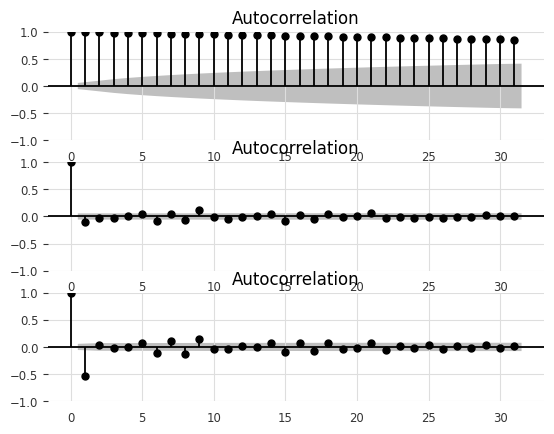

In [63]:
from statsmodels.graphics.tsaplots import plot_acf

fig, (ax1, ax2, ax3) = plt.subplots(3)
plot_acf(df_price['Close'], ax=ax1)
plot_acf(df_price['Close'].diff().dropna(), ax=ax2)
plot_acf(df_price['Close'].diff().diff().dropna(), ax=ax3)
#plot_acf(ts_after_covid)
plt.show()
# from the ACF chart we find out data's AR(p) = 0

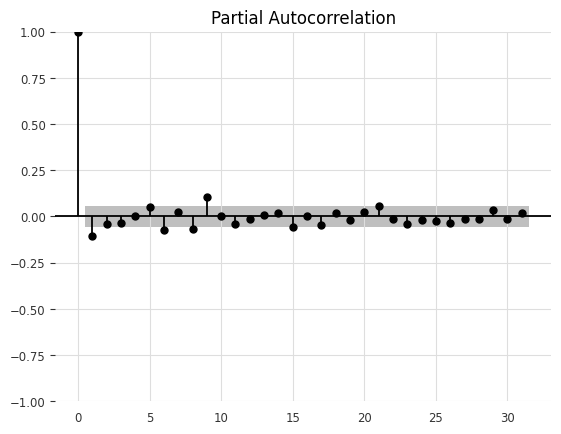

In [64]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df_price['Close'].diff().dropna())
plt.show()

# from the chart we decide our data has no relationship with previous data, this indicates MA(q)=0

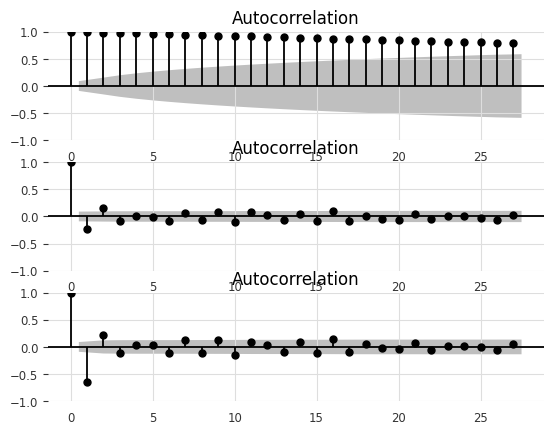

In [65]:
fig, (ax1, ax2, ax3) = plt.subplots(3)
plot_acf(df_covid['Close'], ax=ax1)
plot_acf(df_covid['Close'].diff().dropna(), ax=ax2)
plot_acf(df_covid['Close'].diff().diff().dropna(), ax=ax3)
plt.show()

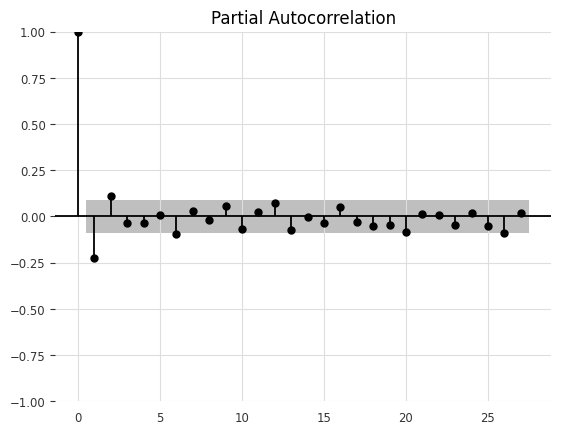

In [66]:
plot_pacf(df_covid['Close'].diff().dropna())
plt.show()

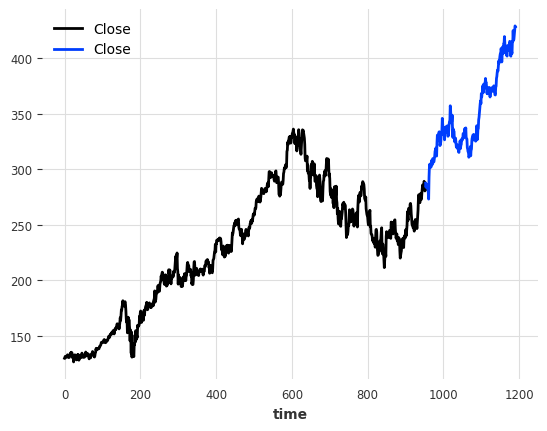

In [3]:
# data split the train and test
train, test = ts_price.split_after(0.8)
train.plot()
test.plot()

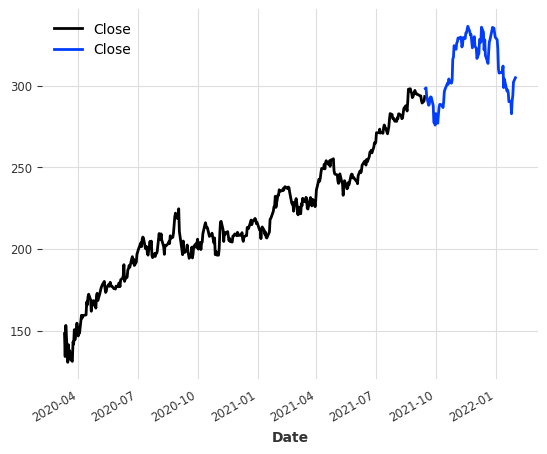

In [4]:
train_covid, test_covid = ts_covid.split_after(0.8)
train_covid.plot()
test_covid.plot()

ARIMA RMSE = 4.80
ARIMA R2 = 0.98
ARIMA MAPE = 1.05


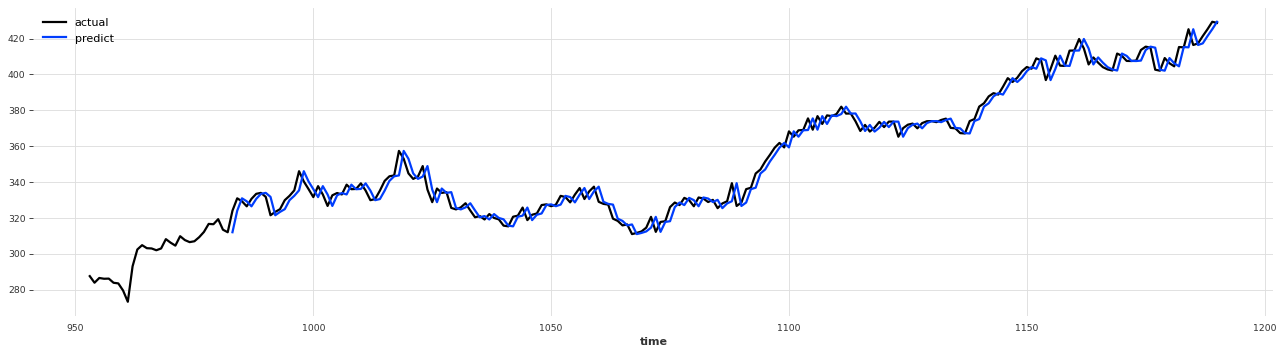

In [5]:
# implementation ARIMA model #time: 7.3s
from darts.models import ARIMA
from darts.metrics import mape, rmse, r2_score

arima = ARIMA(p=0, d=1, q=0)
arima.fit(train)

pred_price = arima.historical_forecasts(series=test)

# Evaluation
arima_rmse = rmse(test, pred_price)
arima__r2 = r2_score(test, pred_price)
arima_mape = mape(test, pred_price)

print("ARIMA RMSE = %.2f" % arima_rmse)
print("ARIMA R2 = %.2f" % arima__r2)
print("ARIMA MAPE = %.2f" % arima_mape)

plt.figure(figsize=(20, 5), dpi=80)
test['Close'].plot(label="actual")
pred_price.plot(label="predict")
plt.show()

ARIMA RMSE = 3.90
ARIMA R2 = 0.92
ARIMA MAPE = 0.80


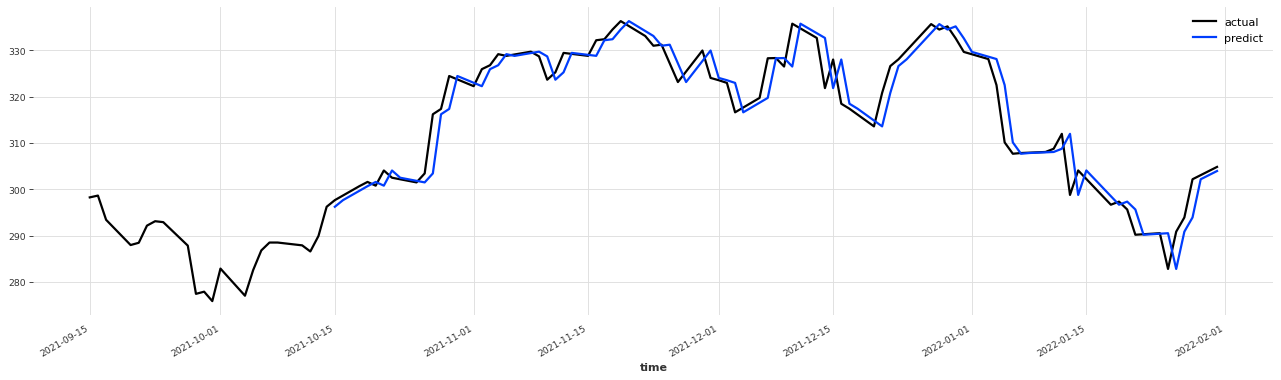

In [6]:
# time: 4.7S
arima = ARIMA(p=0, d=1, q=0) 
arima.fit(train_covid)

pred_price = arima.historical_forecasts(series=test_covid)

# Evaluation
arima_rmse = rmse(test_covid, pred_price)
arima__r2 = r2_score(test_covid, pred_price)
arima_mape = mape(test_covid, pred_price)

print("ARIMA RMSE = %.2f" % arima_rmse)
print("ARIMA R2 = %.2f" % arima__r2)
print("ARIMA MAPE = %.2f" % arima_mape)

plt.figure(figsize=(20, 5), dpi=80)
test_covid['Close'].plot(label="actual")
pred_price.plot(label="predict")
plt.show()

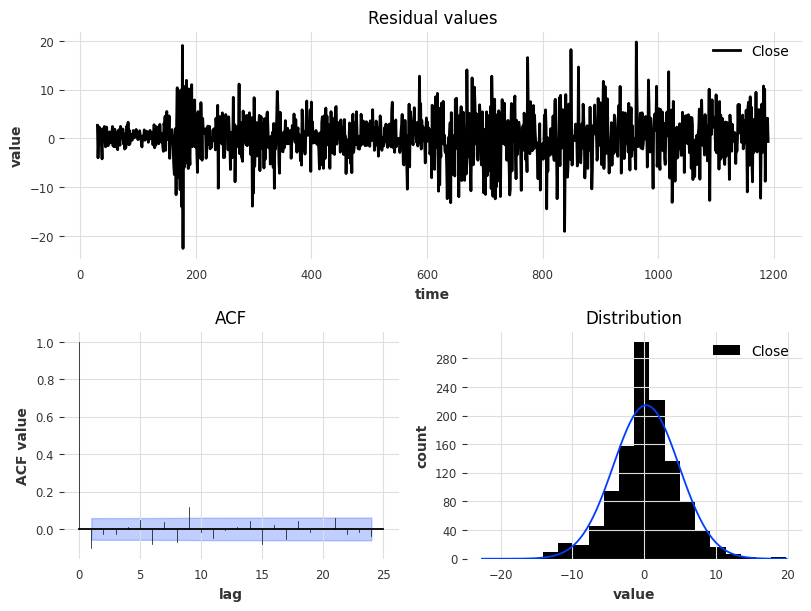

In [73]:
# model evaluation

from darts.utils.statistics import plot_residuals_analysis

plot_residuals_analysis(arima.residuals(ts_price))

In [15]:
# EXponential model # Cal.time takes too much.
from darts.models import ExponentialSmoothing, TBATS, Theta


def eval_model(model):
    model.fit(train)
    forecast = model.historical_forecasts(series=test)
    print("model {} obtains RMSE: {:.2f}".format(model, rmse(test, forecast)))
    print("model {} obtains R2: {:.2f}%".format(model, r2_score(test, forecast)))
    print("model {} obtains MAPE: {:.2f}%".format(model, mape(test, forecast)))


eval_model(ExponentialSmoothing())
#eval_model(TBATS())
eval_model(Theta())

model ExponentialSmoothing() obtains RMSE: 5.04
model ExponentialSmoothing() obtains R2: 0.98%
model ExponentialSmoothing() obtains MAPE: 1.09%
model Theta() obtains RMSE: 4.95
model Theta() obtains R2: 0.98%
model Theta() obtains MAPE: 1.07%


In [11]:

def eval_model(model):
    model.fit(train_covid)
    forecast = model.historical_forecasts(series=test_covid)
    print("model {} obtains RMSE: {:.2f}".format(model, rmse(test_covid, forecast)))
    print("model {} obtains R2: {:.2f}%".format(model, r2_score(test_covid, forecast)))
    print("model {} obtains MAPE: {:.2f}%".format(model, mape(test_covid, forecast)))

eval_model(ExponentialSmoothing())
#eval_model(TBATS())
eval_model(Theta())

model ExponentialSmoothing() obtains RMSE: 4.22
model ExponentialSmoothing() obtains R2: 0.94%
model ExponentialSmoothing() obtains MAPE: 0.92%
model Theta() obtains RMSE: 3.84
model Theta() obtains R2: 0.95%
model Theta() obtains MAPE: 0.82%


### machine learning- SVM, RF, linear

regression RMSE = 5.18
regression R2 = 0.98
regression MAPE = 1.13


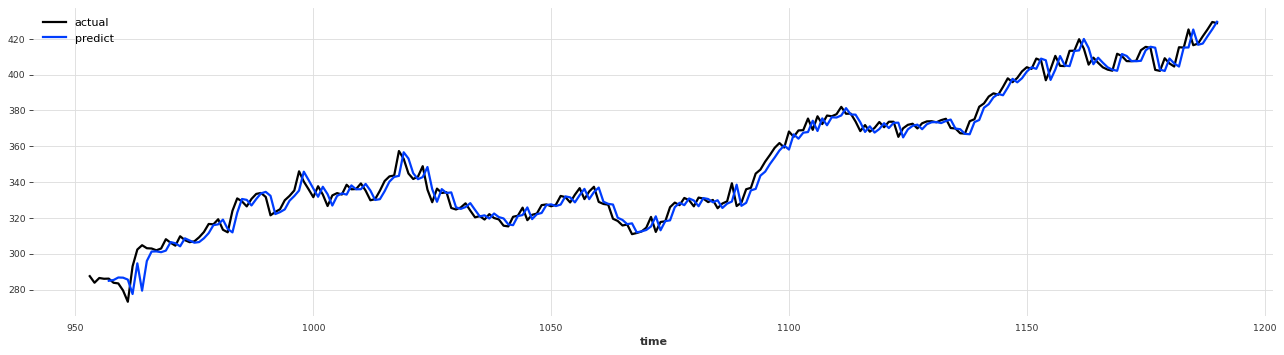

In [14]:
from darts.models import RegressionModel # time : 0.6s
from sklearn.linear_model import Ridge

regression = RegressionModel(
    model=Ridge(),
    lags=1,
    output_chunk_length=2
)
regression.fit(train)
pred = regression.historical_forecasts(series=test)

# Evaluation
regression_rmse = rmse(test, pred)
regression__r2 = r2_score(test, pred)
regression_mape = mape(test, pred)

print("regression RMSE = %.2f" % regression_rmse)
print("regression R2 = %.2f" % regression__r2)
print("regression MAPE = %.2f" % regression_mape)

plt.figure(figsize=(20, 5), dpi=80)
test['Close'].plot(label="actual")
pred.plot(label="predict")
plt.show()

regression RMSE = 4.11
regression R2 = 0.95
regression MAPE = 0.91


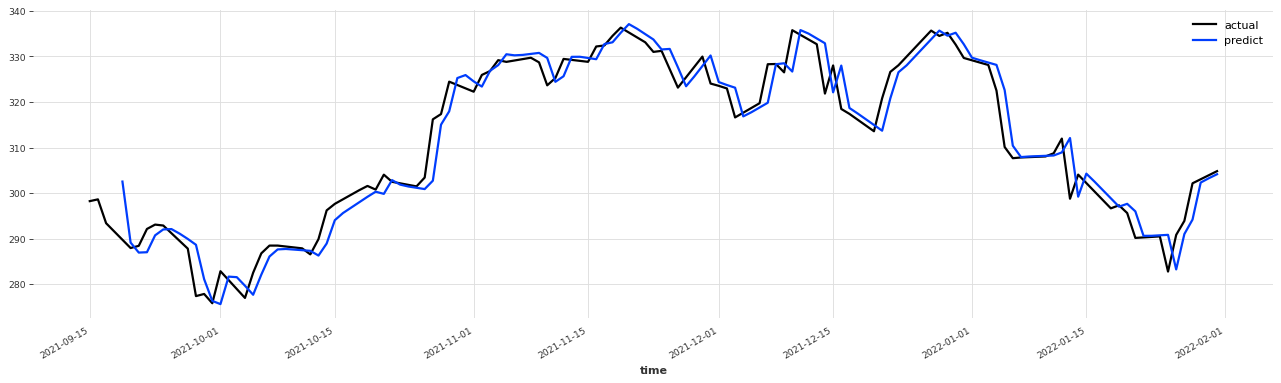

In [16]:
regression = RegressionModel(
    model=Ridge(),
    lags=1,
    output_chunk_length=2
)
regression.fit(train_covid)
pred = regression.historical_forecasts(series=test_covid)

# Evaluation
regression_rmse = rmse(test_covid, pred)
regression__r2 = r2_score(test_covid, pred)
regression_mape = mape(test_covid, pred)

print("regression RMSE = %.2f" % regression_rmse)
print("regression R2 = %.2f" % regression__r2)
print("regression MAPE = %.2f" % regression_mape)

plt.figure(figsize=(20, 5), dpi=80)
test_covid['Close'].plot(label="actual")
pred.plot(label="predict")
plt.show()

rf RMSE = 7.96
rf R2 = 0.95
rf MAPE = 1.81


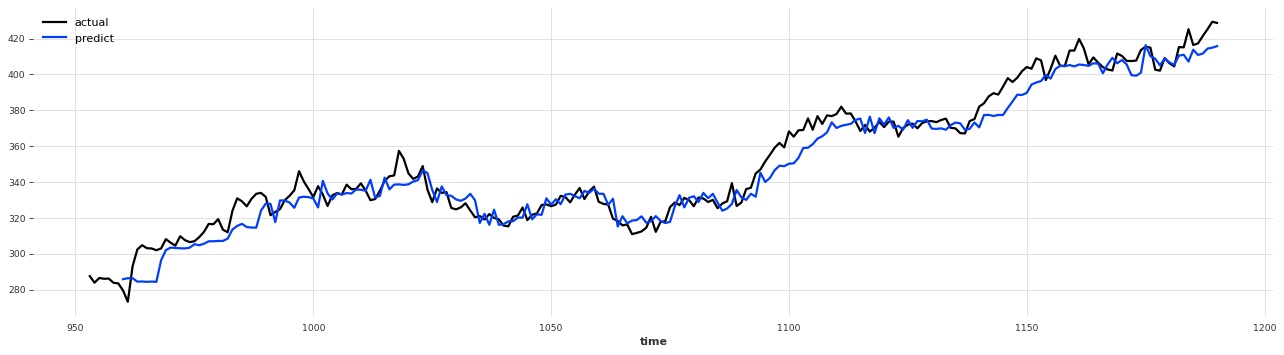

In [17]:
# random forest model
from darts.models import RandomForest

rf = RandomForest(
    lags=1,
    output_chunk_length=5,
    n_estimators=100,
    criterion="absolute_error",
)
rf.fit(train)
pred = rf.historical_forecasts(series=test)

# Evaluation
rf_rmse = rmse(test, pred)
rf__r2 = r2_score(test, pred)
rf_mape = mape(test, pred)

print("rf RMSE = %.2f" % rf_rmse)
print("rf R2 = %.2f" % rf__r2)
print("rf MAPE = %.2f" % rf_mape)

plt.figure(figsize=(20, 5), dpi=80)
test['Close'].plot(label="actual")
pred.plot(label="predict")
plt.show()

rf RMSE = 6.62
rf R2 = 0.86
rf MAPE = 1.55


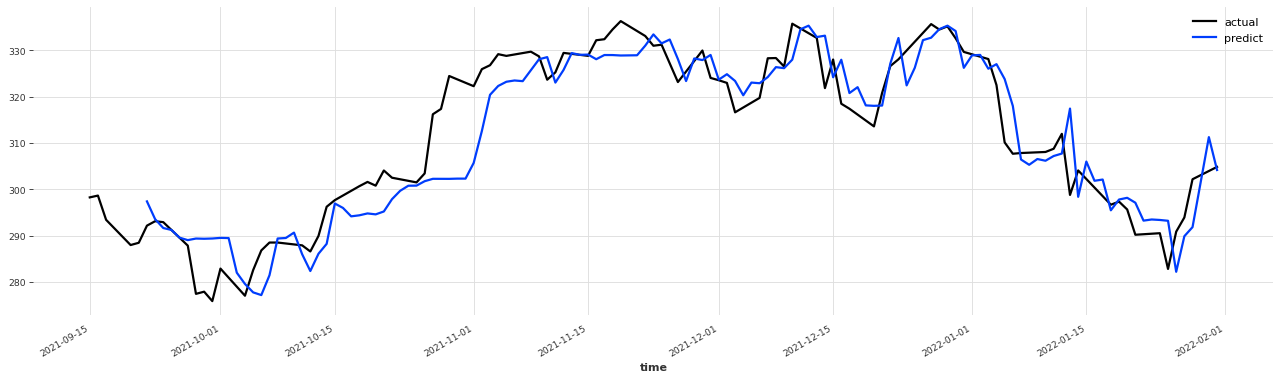

In [18]:
rf = RandomForest(
    lags=1,
    output_chunk_length=5,
    n_estimators=100,
    criterion="absolute_error",
)
rf.fit(train_covid)
pred = rf.historical_forecasts(series=test_covid)

# Evaluation
rf_rmse = rmse(test_covid, pred)
rf__r2 = r2_score(test_covid, pred)
rf_mape = mape(test_covid, pred)

print("rf RMSE = %.2f" % rf_rmse)
print("rf R2 = %.2f" % rf__r2)
print("rf MAPE = %.2f" % rf_mape)

plt.figure(figsize=(20, 5), dpi=80)
test_covid['Close'].plot(label="actual")
pred.plot(label="predict")
plt.show()

rf RMSE = 8.29
rf R2 = 0.95
rf MAPE = 1.91


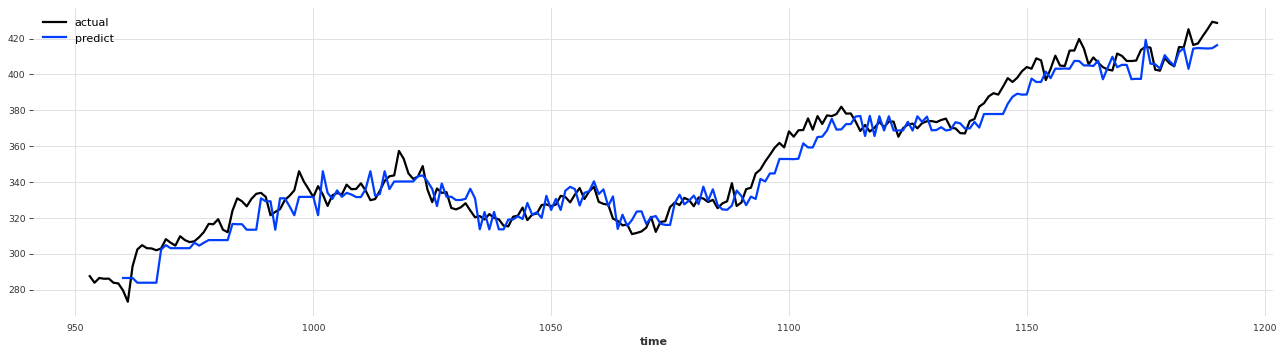

In [19]:
from darts.models import XGBModel

XGB = XGBModel(
    lags=1,
    output_chunk_length=5,
)
XGB.fit(train)
pred = XGB.historical_forecasts(series=test)

# Evaluation
XGB_rmse = rmse(test, pred)
XGB__r2 = r2_score(test, pred)
XGB_mape = mape(test, pred)

print("rf RMSE = %.2f" % XGB_rmse)
print("rf R2 = %.2f" % XGB__r2)
print("rf MAPE = %.2f" % XGB_mape)

plt.figure(figsize=(20, 5), dpi=80)
test['Close'].plot(label="actual")
pred.plot(label="predict")
plt.show()

rf RMSE = 7.16
rf R2 = 0.84
rf MAPE = 1.70


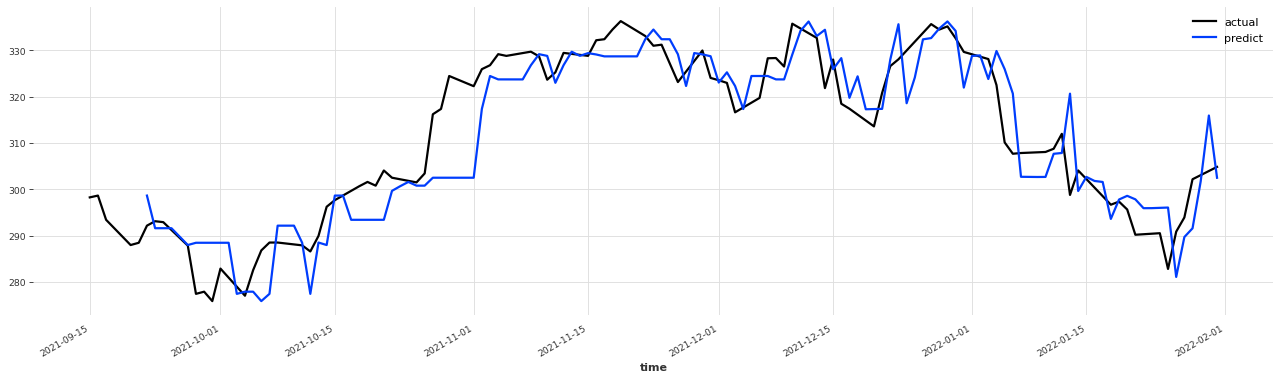

In [21]:
XGB = XGBModel(
    lags=1,
    output_chunk_length=5,
)
XGB.fit(train_covid)
pred = XGB.historical_forecasts(series=test_covid)

# Evaluation
XGB_rmse = rmse(test_covid, pred)
XGB__r2 = r2_score(test_covid, pred)
XGB_mape = mape(test_covid, pred)

print("XGB RMSE = %.2f" % XGB_rmse)
print("XGB R2 = %.2f" % XGB__r2)
print("XGB MAPE = %.2f" % XGB_mape)

plt.figure(figsize=(20, 5), dpi=80)
test_covid['Close'].plot(label="actual")
pred.plot(label="predict")
plt.show()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 12.5 M
---------------------------------------------------
12.5 M    Trainable params
1.5 K     Non-trainable params
12.5 M    Total params
49.949    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

RMSE = 5.28
R2 = 0.98
MAPE = 1.17


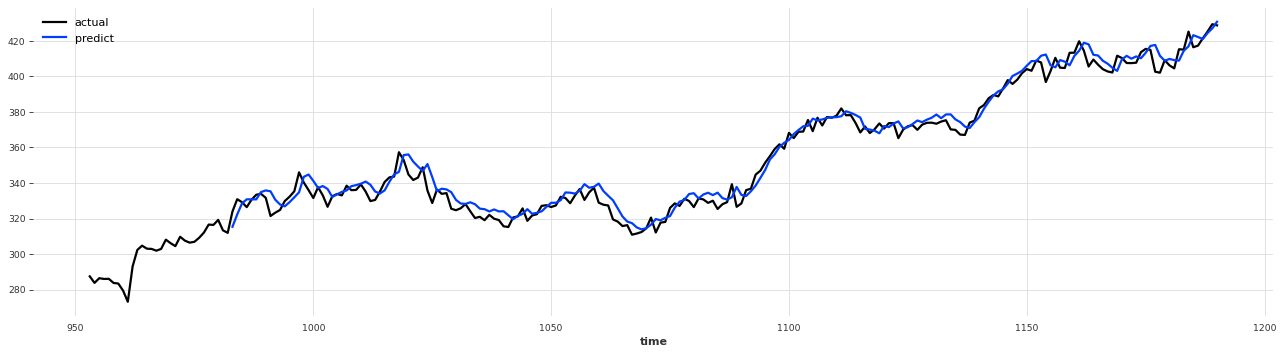

In [22]:
# n-beats

from darts.models import NBEATSModel
NBEATS = NBEATSModel(
    input_chunk_length=30,
    output_chunk_length=10,
    generic_architecture=True, num_stacks=10, num_blocks=6, num_layers=4,
    n_epochs=50,
    activation='LeakyReLU',
)
NBEATS.fit(train['Close'])

NBEATS_pred_series = NBEATS.historical_forecasts(
    series=test['Close'],
    retrain=False,
    verbose=False,
)

nbeats4_rmse = rmse(test['Close'], NBEATS_pred_series)
nbeats4_r2 = r2_score(test['Close'], NBEATS_pred_series)
nbeats4_mape = mape(test['Close'], NBEATS_pred_series)

print("NBEATS RMSE = %.2f" % nbeats4_rmse)
print("NBEATS R2 = %.2f" % nbeats4_r2)
print("NBEATS MAPE = %.2f" % nbeats4_mape)

plt.figure(figsize=(20, 5), dpi=80)
test['Close'].plot(label="actual")
NBEATS_pred_series.plot(label="predict")
plt.show()

In [24]:
from darts.models import TCNModel,NBEATSModel,TransformerModel,BlockRNNModel

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 12.5 M
---------------------------------------------------
12.5 M    Trainable params
1.5 K     Non-trainable params
12.5 M    Total params
49.949    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

NBEATS RMSE = 7.84
NBEATS R2 = 0.69
NBEATS MAPE = 2.03


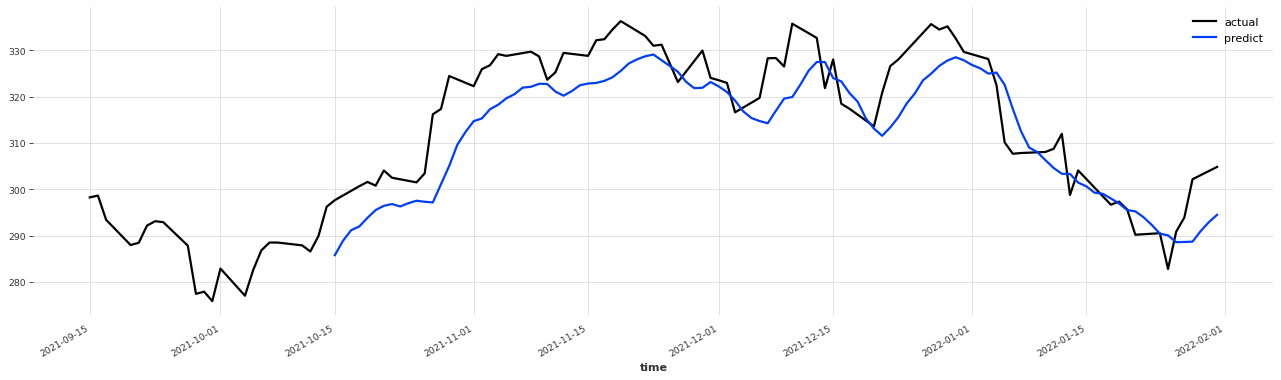

In [23]:
NBEATS = NBEATSModel(
    input_chunk_length=30,
    output_chunk_length=10,
    generic_architecture=True, num_stacks=10, num_blocks=6, num_layers=4,
    n_epochs=50,
    activation='LeakyReLU',
)
NBEATS.fit(train_covid['Close'])

NBEATS_pred_series = NBEATS.historical_forecasts(
    series=test_covid['Close'],
    retrain=False,
    verbose=False,
)

nbeats4_rmse = rmse(test_covid['Close'], NBEATS_pred_series)
nbeats4_r2 = r2_score(test_covid['Close'], NBEATS_pred_series)
nbeats4_mape = mape(test_covid['Close'], NBEATS_pred_series)

print("NBEATS RMSE = %.2f" % nbeats4_rmse)
print("NBEATS R2 = %.2f" % nbeats4_r2)
print("NBEATS MAPE = %.2f" % nbeats4_mape)

plt.figure(figsize=(20, 5), dpi=80)
test_covid['Close'].plot(label="actual")
NBEATS_pred_series.plot(label="predict")
plt.show()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type              | Params
----------------------------------------------------
0 | criterion     | MSELoss           | 0     
1 | train_metrics | MetricCollection  | 0     
2 | val_metrics   | MetricCollection  | 0     
3 | dropout       | MonteCarloDropout | 0     
4 | res_blocks    | ModuleList        | 1.3 K 
----------------------------------------------------
1.3 K     Trainable params
0         Non-trainable params
1.3 K     Total params
0.005     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

TCN RMSE = 13.24
TCN R2 = 0.83
TCN MAPE = 3.02


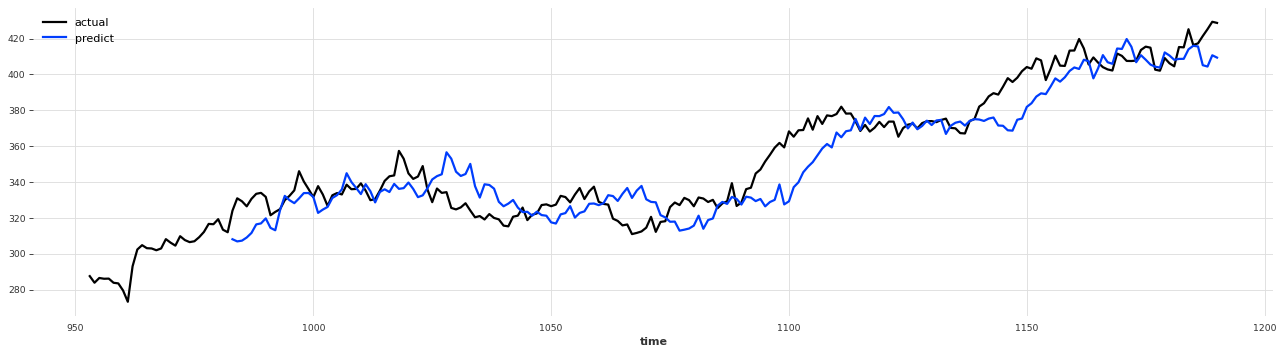

In [25]:
# TCN
TCN = TCNModel(
    input_chunk_length=30,
    output_chunk_length=10,
    kernel_size=4, num_filters=6, num_layers=5,
    n_epochs=50, dropout=0.01,
)
TCN.fit(train['Close'])

TCN_pred_series = TCN.historical_forecasts(
    series=test['Close'],
    retrain=False,
    verbose=False)

TCN_rmse = rmse(TCN_pred_series, test)
TCN_r2 = r2_score(TCN_pred_series, test)
TCN_mape = mape(TCN_pred_series, test)
print("TCN RMSE = %.2f" % TCN_rmse)
print("TCN R2 = %.2f" % TCN_r2)
print("TCN MAPE = %.2f" % TCN_mape)

plt.figure(figsize=(20, 5), dpi=80)
test['Close'].plot(label="actual")
TCN_pred_series.plot(label="predict")
plt.show()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type              | Params
----------------------------------------------------
0 | criterion     | MSELoss           | 0     
1 | train_metrics | MetricCollection  | 0     
2 | val_metrics   | MetricCollection  | 0     
3 | dropout       | MonteCarloDropout | 0     
4 | res_blocks    | ModuleList        | 1.3 K 
----------------------------------------------------
1.3 K     Trainable params
0         Non-trainable params
1.3 K     Total params
0.005     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

TCN RMSE = 15.31
TCN R2 = -0.23
TCN MAPE = 4.20


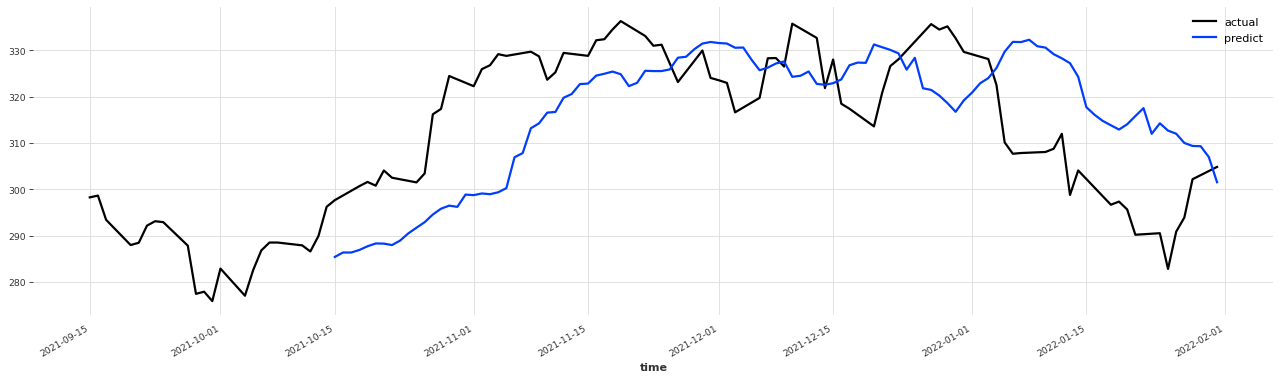

In [26]:
# TCN
TCN = TCNModel(
    input_chunk_length=30,
    output_chunk_length=10,
    kernel_size=4, num_filters=6, num_layers=5,
    n_epochs=50, dropout=0.01,
)
TCN.fit(train_covid['Close'])

TCN_pred_series = TCN.historical_forecasts(
    series=test_covid['Close'],
    retrain=False,
    verbose=False)

TCN_rmse = rmse(TCN_pred_series, test_covid)
TCN_r2 = r2_score(TCN_pred_series, test_covid)
TCN_mape = mape(TCN_pred_series, test_covid)
print("TCN RMSE = %.2f" % TCN_rmse)
print("TCN R2 = %.2f" % TCN_r2)
print("TCN MAPE = %.2f" % TCN_mape)

plt.figure(figsize=(20, 5), dpi=80)
test_covid['Close'].plot(label="actual")
TCN_pred_series.plot(label="predict")
plt.show()

In [ ]:
# RNN
rnn_3 = BlockRNNModel(
    input_chunk_length=30,
    output_chunk_length=10,
    model ="RNN",
    hidden_dim=100,
    n_rnn_layers=6,
    n_epochs=50
)
rnn_3.fit(train['Close'])

pred_rnnseries_3 = rnn_3.historical_forecasts(
    series=test['Close'],
    retrain=False,
    verbose=False,
)

rnn_3_rmse = rmse(pred_rnnseries_3, test)
rnn_3_r2 = r2_score(pred_rnnseries_3, test)
rnn_3_mape = mape(pred_rnnseries_3, test)

print("RNN RMSE = %.2f" % rnn_3_rmse)
print("RNN R2 = %.2f" % rnn_3_r2)
print("RNN MAPE = %.2f" % rnn_3_mape)

plt.figure(figsize=(20, 5), dpi=80)
test.plot(label="actual")
pred_rnnseries_3.plot(label="predict")
plt.show()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | RNN              | 111 K 
4 | fc            | Sequential       | 1.0 K 
---------------------------------------------------
112 K     Trainable params
0         Non-trainable params
112 K     Total params
0.449     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

RNN RMSE = 237.02
RNN R2 = -6951764257849518907509964800.00
RNN MAPE = 292.24


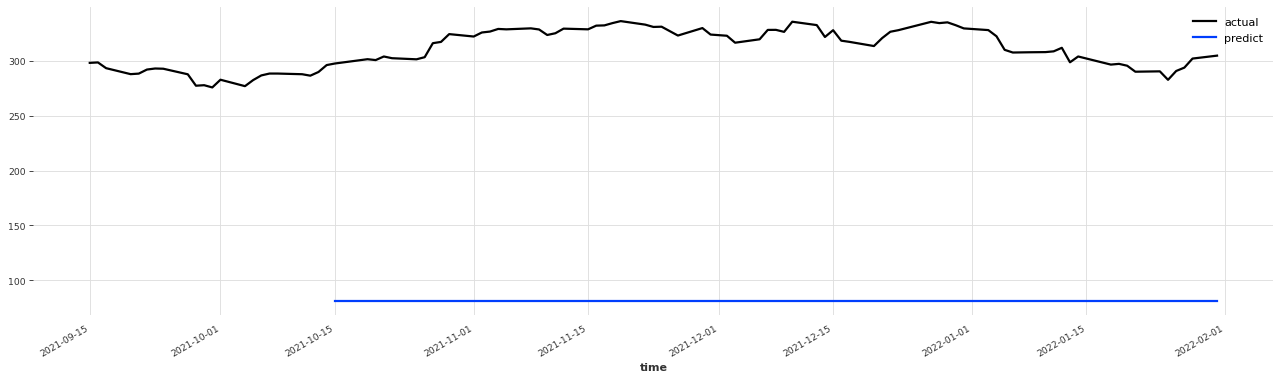

In [27]:
# RNN
rnn_3 = BlockRNNModel(
    input_chunk_length=30,
    output_chunk_length=10,
    model ="RNN",
    hidden_dim=100,
    n_rnn_layers=6,
    n_epochs=50
)
rnn_3.fit(train_covid['Close'])

pred_rnnseries_3 = rnn_3.historical_forecasts(
    series=test_covid['Close'],
    retrain=False,
    verbose=False,
)

rnn_3_rmse = rmse(pred_rnnseries_3, test_covid)
rnn_3_r2 = r2_score(pred_rnnseries_3, test_covid)
rnn_3_mape = mape(pred_rnnseries_3, test_covid)

print("RNN RMSE = %.2f" % rnn_3_rmse)
print("RNN R2 = %.2f" % rnn_3_r2)
print("RNN MAPE = %.2f" % rnn_3_mape)

plt.figure(figsize=(20, 5), dpi=80)
test_covid.plot(label="actual")
pred_rnnseries_3.plot(label="predict")
plt.show()

In [28]:
#LSTM
LSTM_3 = BlockRNNModel(
    input_chunk_length=30,
    output_chunk_length=10,
    model ="LSTM",
    hidden_dim=70,
    n_rnn_layers=5,
    n_epochs=30
)
LSTM_3.fit(train['Close'])

pred_LSTM_series_3 = LSTM_3.historical_forecasts(
    series=test['Close'],
    retrain=False,
    verbose=False,
)

# Evaluation
LSTM3_rmse = rmse(test, pred_LSTM_series_3)
#LSTM1_r2 = r2_score(pred_pris, actual_pris[:208])
#LSTM1_mape = mape(pred_pris, actual_pris[:208])

print("RMSE = %.2f" % LSTM3_rmse)
#print("R2 = %.2f" % LSTM1_r2)
#print("MAPE = %.2f" % LSTM1_mape)

plt.figure(figsize=(20, 5), dpi=80)
test.plot(label="actual")
pred_LSTM_series_3.plot(label="predict")
plt.show()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | LSTM             | 179 K 
4 | fc            | Sequential       | 710   
---------------------------------------------------
180 K     Trainable params
0         Non-trainable params
180 K     Total params
0.721     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=30` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

In [ ]:
#LSTM with covid
LSTM_3 = BlockRNNModel(
    input_chunk_length=30,
    output_chunk_length=10,
    model ="LSTM",
    hidden_dim=70,
    n_rnn_layers=5,
    n_epochs=30
)
LSTM_3.fit(train_covid['Close'])

pred_LSTM_series_3 = LSTM_3.historical_forecasts(
    series=test_covid['Close'],
    retrain=False,
    verbose=False,
)

# Evaluation
LSTM3_rmse = rmse(test_covid, pred_LSTM_series_3)
#LSTM1_r2 = r2_score(pred_pris, actual_pris[:208])
#LSTM1_mape = mape(pred_pris, actual_pris[:208])

print("RMSE = %.2f" % LSTM3_rmse)
#print("R2 = %.2f" % LSTM1_r2)
#print("MAPE = %.2f" % LSTM1_mape)

plt.figure(figsize=(20, 5), dpi=80)
test_covid.plot(label="actual")
pred_LSTM_series_3.plot(label="predict")
plt.show()

In [ ]:
# GRU
GRU_4 = BlockRNNModel(
    input_chunk_length=30,
    output_chunk_length=10,
    model ="GRU",
    hidden_dim=100,
    n_rnn_layers=6,
    n_epochs=50
)
GRU_4.fit(train['Close'])

pred_GRU_series_4 = GRU_4.historical_forecasts(
    series=test['Close'],
    retrain=False,
    verbose=False,
)

# Evaluation
GRU4_rmse = rmse(pred_GRU_series_4, test)
#GRU1_r2 = r2_score(pred_pris, actual_pris[:208])
#GRU1_mape = mape(pred_pris, actual_pris[:208])

print("RMSE = %.2f" % GRU4_rmse)
#print("R2 = %.2f" % GRU1_r2)
#print("MAPE = %.2f" % GRU1_mape)

plt.figure(figsize=(20, 5), dpi=80)
test.plot(label="actual")
pred_GRU_series_4.plot(label="predict")
plt.show()

In [ ]:
# GRU
GRU_4 = BlockRNNModel(
    input_chunk_length=30,
    output_chunk_length=10,
    model ="GRU",
    hidden_dim=100,
    n_rnn_layers=6,
    n_epochs=50
)
GRU_4.fit(train_covid['Close'])

pred_GRU_series_4 = GRU_4.historical_forecasts(
    series=test_covid['Close'],
    retrain=False,
    verbose=False,
)

# Evaluation
GRU4_rmse = rmse(pred_GRU_series_4, test_covid)
#GRU1_r2 = r2_score(pred_pris, actual_pris[:208])
#GRU1_mape = mape(pred_pris, actual_pris[:208])

print("RMSE = %.2f" % GRU4_rmse)
#print("R2 = %.2f" % GRU1_r2)
#print("MAPE = %.2f" % GRU1_mape)

plt.figure(figsize=(20, 5), dpi=80)
test_covid.plot(label="actual")
pred_GRU_series_4.plot(label="predict")
plt.show()